In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV


# generate two class dataset
data = pd.read_csv("11Oct-normalised data-Data.csv")
data.head()


,Cardia_adverse,133b,221-3p,let-7b-5p,130a-3p,206,hsa-miR-654-3p,hsa-miR-16-5p,hsa-miR-20a-5p,hsa-miR-143-3p,...,hsa-miR-let-7e-5p,hsa-miR-129-5p,hsa-miR-205-5p,hsa-miR-497-5p,hsa-miR-214-3p,hsa-miR-199a-3p,hsa-miR-132-3p,hsa-miR-92a-3p,hsa-miR-378a-3p,hsa-miR-99a-5p
0,1,4.898795,-1.398916,2.336982,0.958610,1.862024,3.574644,-2.831999,-1.864063,-1.779026,...,0.286105,10.037741,4.646494,1.164696,2.080123,-1.836956,1.813405,-2.685146,-2.529324,4.098320
1,1,-3.081293,0.176641,4.572735,1.792612,6.028593,5.127210,-3.814917,-0.952137,4.081398,...,3.222984,12.355745,5.266298,9.798261,8.959145,1.561325,4.477083,-1.384653,5.538828,3.179023
2,1,-1.061368,-2.523858,1.877732,0.883168,9.685578,9.697358,-4.317510,-1.634580,1.931748,...,1.403205,9.697358,6.273058,2.125131,9.697358,-1.219484,5.003732,-2.618695,3.539742,9.697358
3,1,2.209047,-0.964138,2.978174,3.093813,1.699160,8.790880,-2.681616,0.938093,0.150238,...,-2.341090,8.790880,2.159155,8.790880,4.235864,0.762869,3.484050,-1.611933,1.545297,4.717610
4,1,7.318370,-0.903080,3.119447,2.195768,7.318370,7.318370,-1.897790,-0.446085,-1.017724,...,7.318370,7.318370,7.318370,7.318370,3.277785,-0.729708,5.199885,-2.868722,-0.617162,5.286721


In [3]:
# Split target and features
X = data.drop(['Cardia_adverse'],axis=1)
X
y = data['Cardia_adverse']
y = y.astype(int)
y
print(X.shape)
print(y.shape)

(38, 91)
(38,)


In [4]:

# Hide warnings (to keep notebook tidy; do not usually do this)
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd
# Import machine learning methods
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [6]:
## Calculate correlation coefficients
from scipy.stats.stats import pearsonr
features = list(X)
correlation = []
significance = []
for feature in features:
    correl = pearsonr(X[feature].values, y.values)
    correlation.append(correl[0])
    significance.append(correl[1])
df = pd.DataFrame()
df['feature'] = features
df['correlation'] = correlation
df['abs_correlation'] = np.abs(correlation)
df['significance'] = significance
df['significant'] = df['significance'] < 0.05 # Label those P<0.01
df.sort_values(by='abs_correlation', ascending=False, inplace=True)

In [7]:
df

,feature,correlation,abs_correlation,significance,significant
68,hsa-miR-1-3p,-0.573201,0.573201,0.000169,True
43,hsa-miR-125b-5p,-0.558224,0.558224,0.000271,True
8,hsa-miR-143-3p,-0.555156,0.555156,0.000297,True
50,hsa-miR-145-5p,-0.487448,0.487448,0.001909,True
67,hsa-miR-122-5p,-0.485444,0.485444,0.002006,True
...,...,...,...,...,...
16,hsa-miR-9-3p,-0.009260,0.009260,0.955997,False
61,hsa-miR-15a-5p,-0.006167,0.006167,0.970687,False
15,hsa-miR-222-3p,-0.005189,0.005189,0.975333,False
20,hsa-miR-320a,0.004339,0.004339,0.979372,False


In [8]:
ordered_features = list(df['feature'])
ordered_features

['hsa-miR-1-3p',
 'hsa-miR-125b-5p',
 'hsa-miR-143-3p',
 'hsa-miR-145-5p',
 'hsa-miR-122-5p',
 'hsa-miR-17-5p',
 'hsa-miR-214-3p',
 'hsa-miR-26a-5p',
 'hsa-miR-378a-3p',
 'hsa-miR-497-5p',
 'hsa-miR-200a-3p',
 'cel-39-3p',
 'hsa-miR-99a-5p',
 'hsa-miR-20a-5p',
 'hsa-miR-654-3p',
 'hsa-miR-194-5p',
 'hsa-miR-133a-3p',
 'hsa-miR-331-3p',
 'hsa-miR-28-3p',
 '206',
 'hsa-miR-181c-5p',
 'hsa-miR-885-3p',
 '130a-3p',
 'hsa-miR-135a-5p',
 'hsa-miR-23a-3p',
 'hsa-miR-1228-5p',
 'hsa-miR-30c-5p',
 'hsa-miR-16-5p',
 'hsa-miR-195-5p',
 'hsa-miR-18a-5p',
 'hsa-miR-223-3p',
 'hsa-miR-208a-3p',
 'hsa-miR-124-3p',
 '133b',
 'hsa-miR-100-5p',
 'hsa-miR-212-3p',
 'hsa-miR-92a-3p',
 'hsa-miR-146a-5p',
 '221-3p',
 'hsa-miR-182-5p',
 'hsa-miR-192-5p',
 'hsa-miR-147a',
 'hsa-miR-101-3p',
 'hsa-miR-208b-3p',
 'has-miR-548c-3p',
 'hsa-miR-150-3p',
 'hsa-miR-34a-5p',
 'hsa-miR-663b',
 'hsa-miR-302a-3p',
 'hsa-miR-29c-3p',
 'hsa-miR-499a-5p',
 'hsa-miR-9-5p',
 'hsa-miR-24-3p',
 'hsa-miR-27a-3p',
 'hsa-miR-1224

In [9]:
"""
Testing our selected features

After statistical selection we may simply choose the top k features, or choose those labeled as signficant (P<0.05).

Here we will incremently add features to the list of features to use (chosen in order of their correlation coefficients), 
and see the effect on model accuracy and ROC AUC as measured by k-fold stratification.

If you are not familiar with k-fold stratification, have a look at:

https://github.com/MichaelAllen1966/1804_python_healthcare/blob/master/titanic/03_k_fold.ipynb

If you are not familiar with ROC AUC, have a look at:

https://github.com/MichaelAllen1966/1804_python_healthcare/blob/master/titanic/06_roc_sensitivity_specificity.ipynb"""

'\nTesting our selected features\n\nAfter statistical selection we may simply choose the top k features, or choose those labeled as signficant (P<0.05).\n\nHere we will incremently add features to the list of features to use (chosen in order of their correlation coefficients), \nand see the effect on model accuracy and ROC AUC as measured by k-fold stratification.\n\nIf you are not familiar with k-fold stratification, have a look at:\n\nhttps://github.com/MichaelAllen1966/1804_python_healthcare/blob/master/titanic/03_k_fold.ipynb\n\nIf you are not familiar with ROC AUC, have a look at:\n\nhttps://github.com/MichaelAllen1966/1804_python_healthcare/blob/master/titanic/06_roc_sensitivity_specificity.ipynb'

In [10]:

def standardise_data(X_train, X_test):
    
    # Initialise a new scaling object for normalising input data
    sc = StandardScaler() 

    # Set up the scaler just on the training set
    sc.fit(X_train)

    # Apply the scaler to the training and test sets
    train_std=sc.transform(X_train)
    test_std=sc.transform(X_test)
    
    return train_std, test_std

In [11]:
# Create list to store accuracies
accuracy_by_feature_number = []
roc_auc_by_feature_number = []

# Loop through feature list
number_of_features = len(ordered_features)
for i in range(number_of_features):
    # print ("{0} features of {1}".format(i, number_of_features))
    features_to_use = ordered_features[0:i+1]
    X_selected = X[features_to_use]
    
    # Convert to NumPy (needed for k-fold method)
    # Convert DataFrames to NumPy arrays
    X_np = X_selected.values
    y_np = y.values
    
    #%% Run k fold model

    # Set up lists to hold results for each k-fold run
    test_acc_results = []
    test_auc_results = []

    # Set up splits
    number_of_splits = 10
    skf = StratifiedKFold(n_splits = number_of_splits)
    skf.get_n_splits(X_np, y)

    # Loop through the k-fold splits
    for train_index, test_index in skf.split(X_np, y_np):
        # Get X and Y train/test
        X_train, X_test = X_np[train_index], X_np[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Get X and Y train/test
        X_train_std, X_test_std = standardise_data(X_train, X_test)

        # Set up and fit model
        model = LogisticRegression(solver='lbfgs')
        model.fit(X_train_std,y_train)

        # Predict test set labels
        y_pred_test = model.predict(X_test_std)
        
        # Calculate accuracy of test sets
        accuracy_test = np.mean(y_pred_test == y_test)
        test_acc_results.append(accuracy_test)
        
        # Get ROC AUC
        probabilities = model.predict_proba(X_test_std)
        probabilities = probabilities[:, 1] # Probability of 'survived' class
        fpr, tpr, thresholds = roc_curve(y_test, probabilities)
        roc_auc = auc(fpr, tpr)
        test_auc_results.append(roc_auc)      
        
    # Add mean accuracy and AUC to record of accuracy by feature number
    accuracy_by_feature_number.append(np.mean(test_acc_results))
    roc_auc_by_feature_number.append(np.mean(test_auc_results))

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

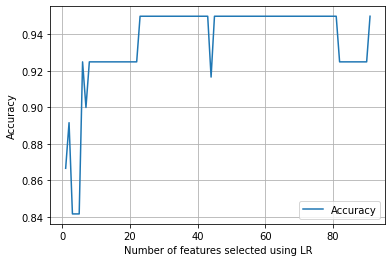

In [15]:

chart_x = list(range(1, number_of_features + 1))

plt.plot(chart_x, accuracy_by_feature_number,
        label = 'Accuracy')

# plt.plot(chart_x, roc_auc_by_feature_number,
#         label = 'ROC AUC')


plt.xlabel('Number of features selected using LR')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()